In [169]:
import requests

url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

In [170]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [171]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.co'

In [172]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [173]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


In [189]:
tr = table.find_all('tr')
tr[:3]

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>,
 <tr>
 <td>30 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</td>
 </tr>]

In [191]:
temp = [] 

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip() 
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip() 
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip() 
    
    
    temp.append((date,ask,bid)) 
    
temp

[('31\xa0Desember\xa02019', '128,62', '127,32'),
 ('30\xa0Desember\xa02019', '128,30', '127,02'),
 ('27\xa0Desember\xa02019', '128,11', '126,83'),
 ('26\xa0Desember\xa02019', '128,27', '126,98'),
 ('23\xa0Desember\xa02019', '128,39', '127,10'),
 ('20\xa0Desember\xa02019', '128,63', '127,34'),
 ('19\xa0Desember\xa02019', '128,24', '126,93'),
 ('18\xa0Desember\xa02019', '128,64', '127,32'),
 ('17\xa0Desember\xa02019', '128,62', '127,33'),
 ('16\xa0Desember\xa02019', '128,67', '127,36'),
 ('13\xa0Desember\xa02019', '128,30', '127,02'),
 ('12\xa0Desember\xa02019', '130,04', '128,71'),
 ('11\xa0Desember\xa02019', '129,65', '128,34'),
 ('10\xa0Desember\xa02019', '129,56', '128,26'),
 ('09\xa0Desember\xa02019', '129,76', '128,44'),
 ('06\xa0Desember\xa02019', '129,78', '128,45'),
 ('05\xa0Desember\xa02019', '130,10', '128,77'),
 ('04\xa0Desember\xa02019', '130,79', '129,45'),
 ('03\xa0Desember\xa02019', '130,15', '128,82'),
 ('02\xa0Desember\xa02019', '129,36', '128,04'),
 ('29\xa0November\xa

In [175]:
temp = temp[::-1]
temp

[('31\xa0Desember\xa02019', '128,62', '127,32'),
 ('30\xa0Desember\xa02019', '128,30', '127,02'),
 ('27\xa0Desember\xa02019', '128,11', '126,83'),
 ('26\xa0Desember\xa02019', '128,27', '126,98'),
 ('23\xa0Desember\xa02019', '128,39', '127,10'),
 ('20\xa0Desember\xa02019', '128,63', '127,34'),
 ('19\xa0Desember\xa02019', '128,24', '126,93'),
 ('18\xa0Desember\xa02019', '128,64', '127,32'),
 ('17\xa0Desember\xa02019', '128,62', '127,33'),
 ('16\xa0Desember\xa02019', '128,67', '127,36'),
 ('13\xa0Desember\xa02019', '128,30', '127,02'),
 ('12\xa0Desember\xa02019', '130,04', '128,71'),
 ('11\xa0Desember\xa02019', '129,65', '128,34'),
 ('10\xa0Desember\xa02019', '129,56', '128,26'),
 ('09\xa0Desember\xa02019', '129,76', '128,44'),
 ('06\xa0Desember\xa02019', '129,78', '128,45'),
 ('05\xa0Desember\xa02019', '130,10', '128,77'),
 ('04\xa0Desember\xa02019', '130,79', '129,45'),
 ('03\xa0Desember\xa02019', '130,15', '128,82'),
 ('02\xa0Desember\xa02019', '129,36', '128,04'),
 ('29\xa0November\xa

In [176]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','ask','bid'))
df.head()

,date,ask,bid
0,31 Desember 2019,"128,62","127,32"
1,30 Desember 2019,"128,30","127,02"
2,27 Desember 2019,"128,11","126,83"
3,26 Desember 2019,"128,27","126,98"
4,23 Desember 2019,"128,39","127,10"


In [177]:
from datetime import datetime

In [178]:
df['ask'] = df['ask'].str.replace(",",".")
df['bid'] = df['bid'].str.replace(",",".")
df.head()

,date,ask,bid
0,31 Desember 2019,128.62,127.32
1,30 Desember 2019,128.30,127.02
2,27 Desember 2019,128.11,126.83
3,26 Desember 2019,128.27,126.98
4,23 Desember 2019,128.39,127.10


In [179]:
df['date'] = df['date'].str.replace("Januari","January")
df['date'] = df['date'].str.replace("Februari","February")
df['date'] = df['date'].str.replace("Maret","March")
df['date'] = df['date'].str.replace("April","April")
df['date'] = df['date'].str.replace("Mei","May")
df['date'] = df['date'].str.replace("Juni","June")
df['date'] = df['date'].str.replace("Juli","July")
df['date'] = df['date'].str.replace("Agustus","August")
df['date'] = df['date'].str.replace("September","September")
df['date'] = df['date'].str.replace("Oktober","October")
df['date'] = df['date'].str.replace("November","November")
df['date'] = df['date'].str.replace("Desember","December")
                                  
df.head()

,date,ask,bid
0,31 December 2019,128.62,127.32
1,30 December 2019,128.30,127.02
2,27 December 2019,128.11,126.83
3,26 December 2019,128.27,126.98
4,23 December 2019,128.39,127.10


In [181]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,ask,bid
0,2019-12-31,128.62,127.32
1,2019-12-30,128.30,127.02
2,2019-12-27,128.11,126.83
3,2019-12-26,128.27,126.98
4,2019-12-23,128.39,127.10


In [182]:
df['month'] = df['date'].dt.month_name()
df.head()

,date,ask,bid,month
0,2019-12-31,128.62,127.32,December
1,2019-12-30,128.30,127.02,December
2,2019-12-27,128.11,126.83,December
3,2019-12-26,128.27,126.98,December
4,2019-12-23,128.39,127.10,December


In [183]:
df['ask'] = df['ask'].astype('float64')
df['bid'] = df['bid'].astype('float64')
df['month'] = df['month'].astype('category')

In [184]:
df.dtypes

date     datetime64[ns]
ask             float64
bid             float64
month          category
dtype: object

In [185]:
import matplotlib.pyplot as plt

In [186]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['month'].unique()

[December, November, October, September, August, ..., May, April, March, February, January]
Length: 12
Categories (12, object): [January < February < March < April ... September < October < November < December]

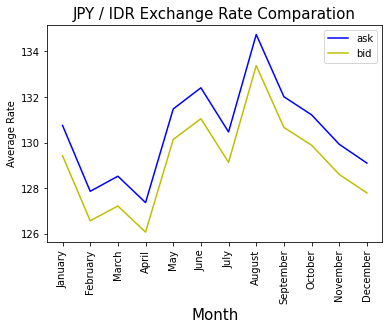

In [195]:
month = df.groupby('month')
ask = month.mean()['ask']
bid = month.mean()['bid']

keys = [pair for pair, df in month]
plt.plot(keys, ask, color='b')
plt.plot(keys, bid, color='y')
plt.title("JPY / IDR Exchange Rate Comparation", size=15)
plt.xticks(keys, rotation='vertical', size=10)
plt.xlabel('Month', size=15)
plt.ylabel('Average Rate')
plt.legend(["ask", "bid"])

plt.show()